In [1]:
%pip install requests
%pip install bs4
%pip install praw


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [40]:
import praw

# Initialize Reddit client credentials
reddit = praw.Reddit(
    client_id='owOagzsnVT9GD7x59GLCDg',
    client_secret='RK_YLsZxhBBxIf-qCzsNWG2VILmBZw',
    user_agent='script:Scraper:1.0 (by /u/Mother-Rutabaga-5903)'
)

In [41]:
# Modified function to fetch comments for multiple keywords
def fetch_comments(subreddit_name, keywords, limit_per_keyword=10000):
    subreddit = reddit.subreddit(subreddit_name)
    comments = []

    # Iterate through each keyword and fetch comments
    for keyword in keywords:
        for submission in subreddit.search(keyword, limit=limit_per_keyword):
            submission.comments.replace_more(limit=0)
            for comment in submission.comments.list():
                comments.append(comment.body)

    return comments

# Example usage with multiple keywords
keywords = ['current elections', 'politics', 'election debates', 'kamala', 'trump', 'presidential election']
comments = fetch_comments('politics', keywords)

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing
cleaned_comments = [preprocess_text(comment) for comment in comments]

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Analyze sentiments
def analyze_sentiment(comment):
    return sia.polarity_scores(comment)['compound']

sentiments = [analyze_sentiment(comment) for comment in cleaned_comments]

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


<Axes: >

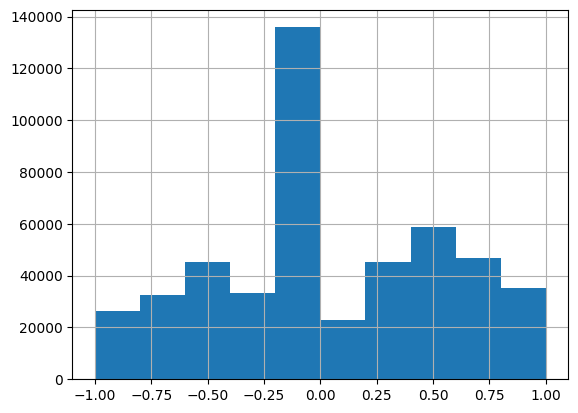

In [11]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'comment': cleaned_comments, 'sentiment': sentiments})

# Visualize sentiment distribution
df['sentiment'].hist()

In [13]:
df.head(20)

,comment,sentiment
0,reminder subreddit civil discussion general co...,-0.9531
1,good thing trump people taken masks civility s...,0.4404
2,lost cause win think rides next presidential e...,-0.7430
3,know hate america,-0.5719
4,insurrectionists disband bar republican party ...,0.4019
5,south everyone like agree article bonehead men...,0.0258
6,traitors,0.0000
7,worst thing ever happen us allowing states sec...,-0.9100
8,politics constituents power greed sustaining g...,-0.4019
9,education critical thinking america lost cause,-0.5574


In [17]:
from nltk import bigrams
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

def extract_bigrams(text):
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())
    # Generate bigrams from the tokens
    return list(bigrams(tokens))

# Apply the function to the "comments" column and create a new column with bigrams
df['bigrams'] = df['comment'].apply(extract_bigrams)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [18]:
df.head(10)

,comment,sentiment,bigrams
0,reminder subreddit civil discussion general co...,-0.9531,"[(reminder, subreddit), (subreddit, civil), (c..."
1,good thing trump people taken masks civility s...,0.4404,"[(good, thing), (thing, trump), (trump, people..."
2,lost cause win think rides next presidential e...,-0.7430,"[(lost, cause), (cause, win), (win, think), (t..."
3,know hate america,-0.5719,"[(know, hate), (hate, america)]"
4,insurrectionists disband bar republican party ...,0.4019,"[(insurrectionists, disband), (disband, bar), ..."
5,south everyone like agree article bonehead men...,0.0258,"[(south, everyone), (everyone, like), (like, a..."
6,traitors,0.0000,[]
7,worst thing ever happen us allowing states sec...,-0.9100,"[(worst, thing), (thing, ever), (ever, happen)..."
8,politics constituents power greed sustaining g...,-0.4019,"[(politics, constituents), (constituents, powe..."
9,education critical thinking america lost cause,-0.5574,"[(education, critical), (critical, thinking), ..."


In [19]:
df = df[1:]

In [21]:
df.head(10)

,comment,sentiment,bigrams
1,good thing trump people taken masks civility s...,0.4404,"[(good, thing), (thing, trump), (trump, people..."
2,lost cause win think rides next presidential e...,-0.7430,"[(lost, cause), (cause, win), (win, think), (t..."
3,know hate america,-0.5719,"[(know, hate), (hate, america)]"
4,insurrectionists disband bar republican party ...,0.4019,"[(insurrectionists, disband), (disband, bar), ..."
5,south everyone like agree article bonehead men...,0.0258,"[(south, everyone), (everyone, like), (like, a..."
6,traitors,0.0000,[]
7,worst thing ever happen us allowing states sec...,-0.9100,"[(worst, thing), (thing, ever), (ever, happen)..."
8,politics constituents power greed sustaining g...,-0.4019,"[(politics, constituents), (constituents, powe..."
9,education critical thinking america lost cause,-0.5574,"[(education, critical), (critical, thinking), ..."
10,tennessee hi everybody sad thing great many pe...,-0.0772,"[(tennessee, hi), (hi, everybody), (everybody,..."


In [39]:
from collections import Counter

# Flatten the list of bigrams for all comments
all_bigrams = [bigram for bigrams_list in df['bigrams'] for bigram in bigrams_list]

# Count the frequency of each bigram
bigram_counts = Counter(all_bigrams)

# Convert to a DataFrame for easy plotting
bigram_df = pd.DataFrame.from_dict(bigram_counts, orient='columns').reset_index()

# Rename the columns
#bigram_df.columns = ['bigram', 'count']

ValueError: If using all scalar values, you must pass an index

In [37]:
bigram_df

,index,0
0,"(good, thing)",766
1,"(thing, trump)",371
2,"(trump, people)",318
3,"(people, taken)",20
4,"(taken, masks)",3
...,...,...
3077024,"(conspiracy, looking)",1
3077025,"(wikipedia, know)",1
3077026,"(carried, county)",1
3077027,"(votes, lycoming)",1


ValueError: Names should be list-like for a MultiIndex

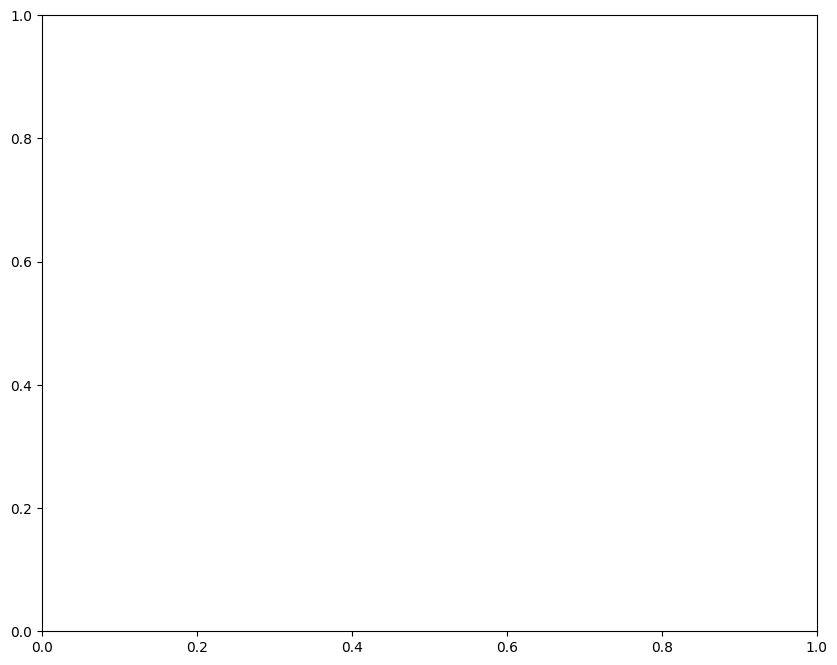

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='bigram', data=bigram_df, palette='viridis')

# Add titles and labels
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')

# Display the plot
plt.show()